In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [3]:
df = pd.read_csv('Super_Store_data.csv', on_bad_lines='skip', encoding='cp1252')
df.set_index('Row ID')

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                       
1       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
4       US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
6       CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
11      CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
...                ...         ...         ...             ...         ...   
9963    CA-2015-168088   3/19/2015   3/22/2015     First Class    CM-12655   
9965    CA-2016-146374   12/5/2016  12/10/2016    Second Class    HE-14800   
9981    US-2015-151435    9/6/2015    9/9/2015    Second Class    SW-20455   
9990    CA-2014-110422   1/21/2014   1/23/2014    Second Class    TB-21400   
9991    CA-2017-121258   2/26/2017    3/3/2017  Standard Class    DB-13060   

           Customer Name      Segment        Country             City  \
Row ID                                                                  
1            Claire Gute     Consumer  United States        Henderson   
2            Claire Gute     Consumer  United States        Henderson   
4         Sean O'Donnell     Consumer  United States  Fort Lauderdale   
6        Brosina Hoffman     Consumer  United States      Los Angeles   
11       Brosina Hoffman     Consumer  United States      Los Angeles   
...                  ...          ...            ...              ...   
9963    Corinna Mitchell  Home Office  United States          Houston   
9965        Harold Engle    Corporate  United States           Newark   
9981         Shaun Weien     Consumer  United States        Lafayette   
9990    Tom Boeckenhauer     Consumer  United States            Miami   
9991         Dave Brooks     Consumer  United States       Costa Mesa   

             State  Postal Code   Region       Product ID   Category  \
Row ID                                                                 
1         Kentucky        42420    South  FUR-BO-10001798  Furniture   
2         Kentucky        42420    South  FUR-CH-10000454  Furniture   
4          Florida        33311    South  FUR-TA-10000577  Furniture   
6       California        90032     West  FUR-FU-10001487  Furniture   
11      California        90032     West  FUR-TA-10001539  Furniture   
...            ...          ...      ...              ...        ...   
9963         Texas        77041  Central  FUR-BO-10004218  Furniture   
9965      Delaware        19711     East  FUR-FU-10002671  Furniture   
9981     Louisiana        70506    South  FUR-TA-10001039  Furniture   
9990       Florida        33180    South  FUR-FU-10001889  Furniture   
9991    California        92627     West  FUR-FU-10000747  Furniture   

       Sub-Category                                       Product Name  \
Row ID                                                                   
1         Bookcases                  Bush Somerset Collection Bookcase   
2            Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
4            Tables      Bretford CR4500 Series Slim Rectangular Table   
6       Furnishings  Eldon Expressions Wood and Plastic Desk Access...   
11           Tables           Chromcraft Rectangular Conference Tables   
...             ...                                                ...   
9963      Bookcases  Bush Heritage Pine Collection 5-Shelf Bookcase...   
9965    Furnishings  Electrix 20W Halogen Replacement Bulb for Zoom...   
9981         Tables                         KI Adjustable-Height Table   
9990    Furnishings                             Ultra Door Pull Handle   
9991    Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   

            Sales  Quantity  Discount    Profit  
Row ID                                           
1        261.9600         2      0.00   41.9136  

In [4]:
print(df.shape)

(2121, 21)


In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
df.describe()

Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000

Checking Missing Values

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Checking Outliers

In [8]:
from sklearn.ensemble import IsolationForest

def detect_outliers(dataframe,contamination):
    a = list(dataframe.select_dtypes(['int64']).columns)+list(dataframe.select_dtypes(['float64']).columns)
    model = IsolationForest(contamination=contamination)
    model.fit(dataframe[a])
    outliers = model.predict(dataframe[a]==-1)
    return outliers

In [9]:
contamination = 0.005
index = detect_outliers(df[['Sales','Quantity','Discount','Profit']], contamination)
outliers = df.iloc[index]
lign, col = outliers.shape
print('Number of outliers:{}'.format(lign))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers:2121


In [10]:
df.iloc[index].head()

Row ID        Order ID Order Date   Ship Date     Ship Mode Customer ID  \
1       2  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
1       2  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
1       2  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
1       2  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
1       2  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   

  Customer Name   Segment        Country       City  ... Postal Code  Region  \
1   Claire Gute  Consumer  United States  Henderson  ...       42420   South   
1   Claire Gute  Consumer  United States  Henderson  ...       42420   South   
1   Claire Gute  Consumer  United States  Henderson  ...       42420   South   
1   Claire Gute  Consumer  United States  Henderson  ...       42420   South   
1   Claire Gute  Consumer  United States  Henderson  ...       42420   South   

        Product ID   Category Sub-Category  \
1  FUR-CH-10000454  Furniture       Chairs   
1  FUR-CH-10000454  Furniture       Chairs   
1  FUR-CH-10000454  Furniture       Chairs   
1  FUR-CH-10000454  Furniture       Chairs   
1  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  Quantity  \
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   

   Discount   Profit  
1       0.0  219.582  
1       0.0  219.582  
1       0.0  219.582  
1       0.0  219.582  
1       0.0  219.582  

[5 rows x 21 columns]

In [11]:
sns.set_style('darkgrid')
def countplot(df,max_columns,val,figsize,title_size=20,title=""):
    l=len(df.columns)
    ligns=ceil(l/max_columns)
    fig=plt.figure(1,figsize=figsize)
    i=1

    for col in df.columns:
        if len(pd.unique(df[col]))<val:
            plt.subplot(ligns,max_columns,i)
            plt.title(col, fontsize=title_size)
            i=i+1
            p=sns.countplot(data = df, x=col,linewidth=5)
            #to increase y ticks size
            plt.yticks(size=50)
            #to increase x ticks
            plt.xticks(size=50)

    fig.tight_layout(pad=3.0)

    fig.suptitle(title)
    plt.show()

title="Different Countplots"
countplot(df,3,15,(80,200),80)
#countsplot dataframe,columns spliting,max_uniquevalues,figsize,title,title_size

In [12]:
df['Country'].unique()

array(['United States'], dtype=object)

In [13]:
df=df.drop(['Country'],axis=1)

In [14]:
print(len(df['State'].unique()))
df['State'].unique()

48


array(['Kentucky', 'Florida', 'California', 'Pennsylvania', 'Utah',
       'Texas', 'Indiana', 'New York', 'Illinois', 'Tennessee',
       'South Carolina', 'Minnesota', 'Colorado', 'Washington',
       'Delaware', 'Ohio', 'Wisconsin', 'Michigan', 'New Jersey',
       'Connecticut', 'Massachusetts', 'Mississippi', 'Arizona',
       'Missouri', 'Georgia', 'Virginia', 'Iowa', 'Nebraska',
       'New Hampshire', 'District of Columbia', 'North Carolina',
       'Arkansas', 'Maryland', 'Alabama', 'Nevada', 'Louisiana', 'Oregon',
       'Oklahoma', 'Rhode Island', 'Maine', 'South Dakota', 'New Mexico',
       'Idaho', 'Vermont', 'Kansas', 'Wyoming', 'Montana',
       'West Virginia'], dtype=object)

In [15]:
len(df['City'].unique())
df['City'].unique()

array(['Henderson', 'Fort Lauderdale', 'Los Angeles', 'Philadelphia',
       'Orem', 'Richardson', 'Houston', 'New Albany', 'Troy', 'Chicago',
       'Memphis', 'Columbia', 'Minneapolis', 'New York City', 'Aurora',
       'Seattle', 'Wilmington', 'Bloomington', 'Roseville', 'Newark',
       'Franklin', 'San Antonio', 'Denver', 'Medina', 'Dublin', 'Detroit',
       'Tampa', 'Lakeville', 'San Francisco', 'Columbus',
       'Colorado Springs', 'Belleville', 'Arvada', 'Hackensack',
       'Murfreesboro', 'Manchester', 'Pembroke Pines', 'Lawrence',
       'Jackson', 'Canton', 'Akron', 'Concord', 'Decatur', 'Phoenix',
       'Park Ridge', 'Amarillo', 'Costa Mesa', 'Parker', 'Gladstone',
       'Lakeland', 'Fort Worth', 'Jacksonville', 'Richmond', 'San Diego',
       'Dearborn', 'Warner Robins', 'Vallejo', 'Vancouver', 'Arlington',
       'Cleveland', 'Tyler', 'Waynesboro', 'Long Beach', 'Dover',
       'Oceanside', 'Trenton', 'Saint Petersburg', 'Des Moines',
       'Lancaster', 'Lake Elsino

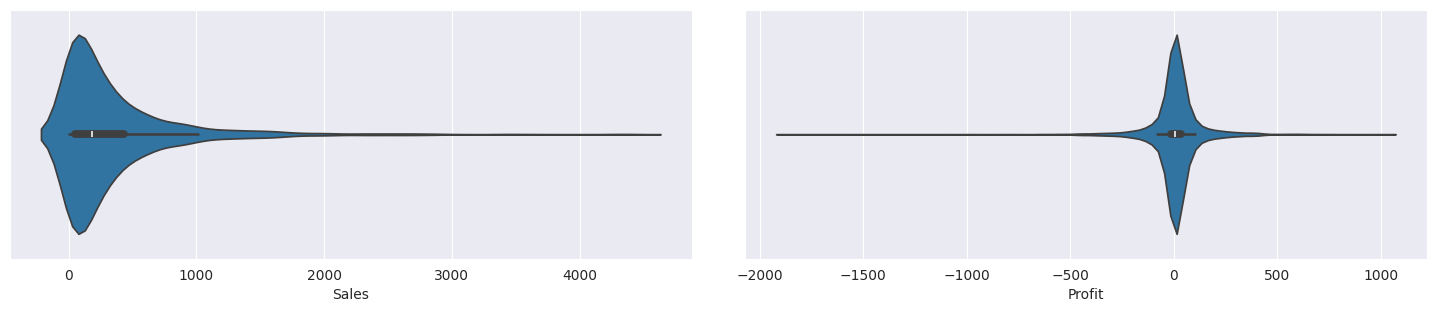

In [16]:
fig2 = plt.figure(2,figsize=(15,10))
plt.subplot(3,2,1)
sns.violinplot(data=df,x="Sales")
plt.subplot(3,2,2)
sns.violinplot(data=df,x="Profit")

fig2.tight_layout(pad=3.0)
plt.show()

Mean Devidation

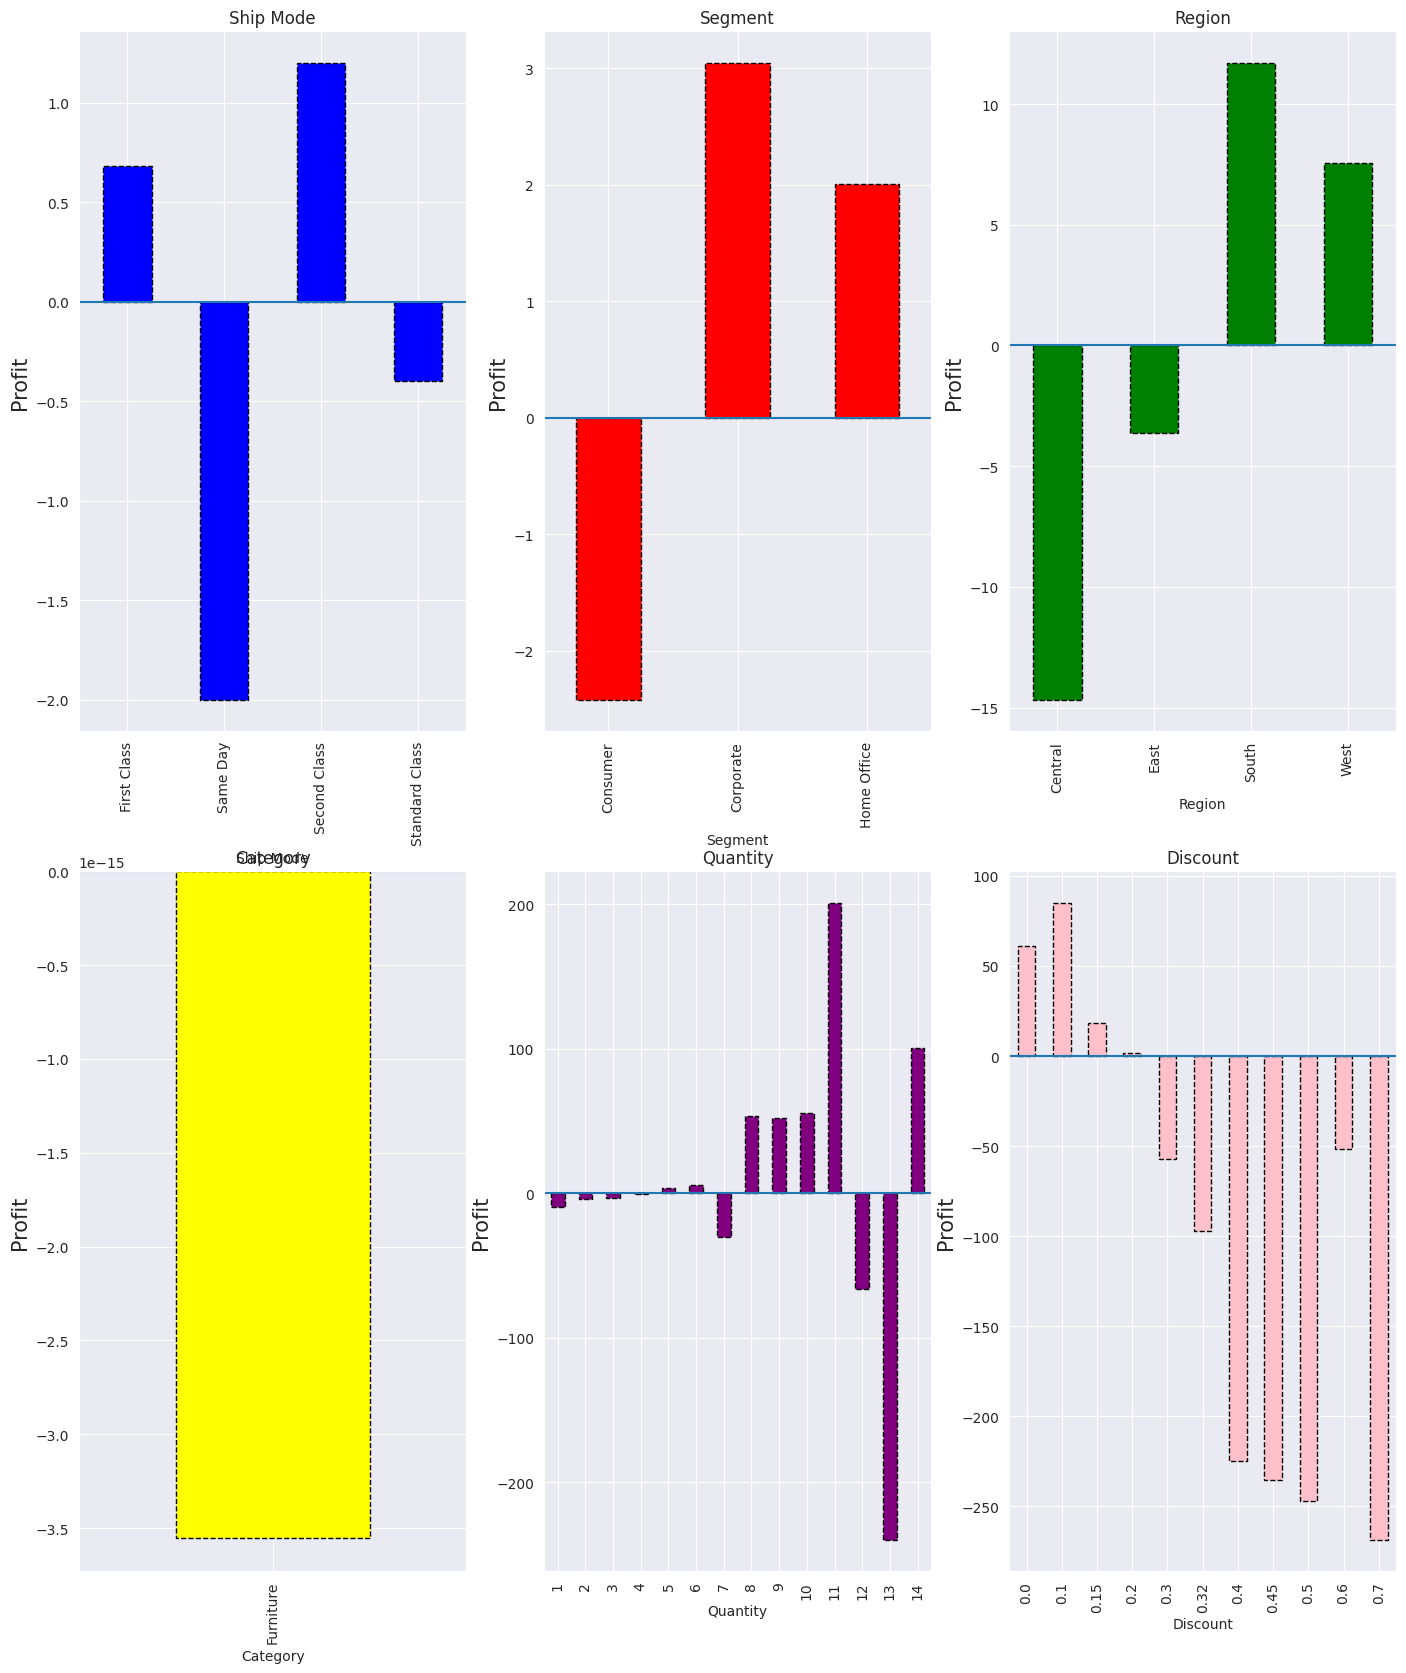

In [17]:
from math import ceil
def mean_dev(dataframe,target,maxcol,cols,palette,size):
    moy=df[target].mean()
    fig=plt.figure(figsize=size)
    l=len(cols)
    ligns=ceil(l/maxcol)
    i=1
    for item in cols:
        plt.subplot(ligns,maxcol,i)
        plt.title(item)
        (df.groupby(str(item))[str(target)].mean()-moy).plot(kind='bar',color=palette[i-1],ls='dashed',edgecolor='Black')
        plt.ylabel(str(target),size=15)
        plt.axhline(y=0)
        i =i+1
    plt.show()
    fig.tight_layout(pad=10.0)
mean_dev(df,'Profit',3,['Ship Mode','Segment','Region','Category','Quantity','Discount'],['Blue','Red','Green','Yellow','Purple','Pink'],(17,20))

ANOVA Testing

In [49]:
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
# cols=['Segment','Region','Category','Quantity','Discount']

# for item in cols:
#     model=ols('Profit ~ {}'.format(item),data=df).fit()
#     anova_result=sm.stats.anova_lm(model,typ=2)
#     print(anova_result)
#     print()




Median Deviation

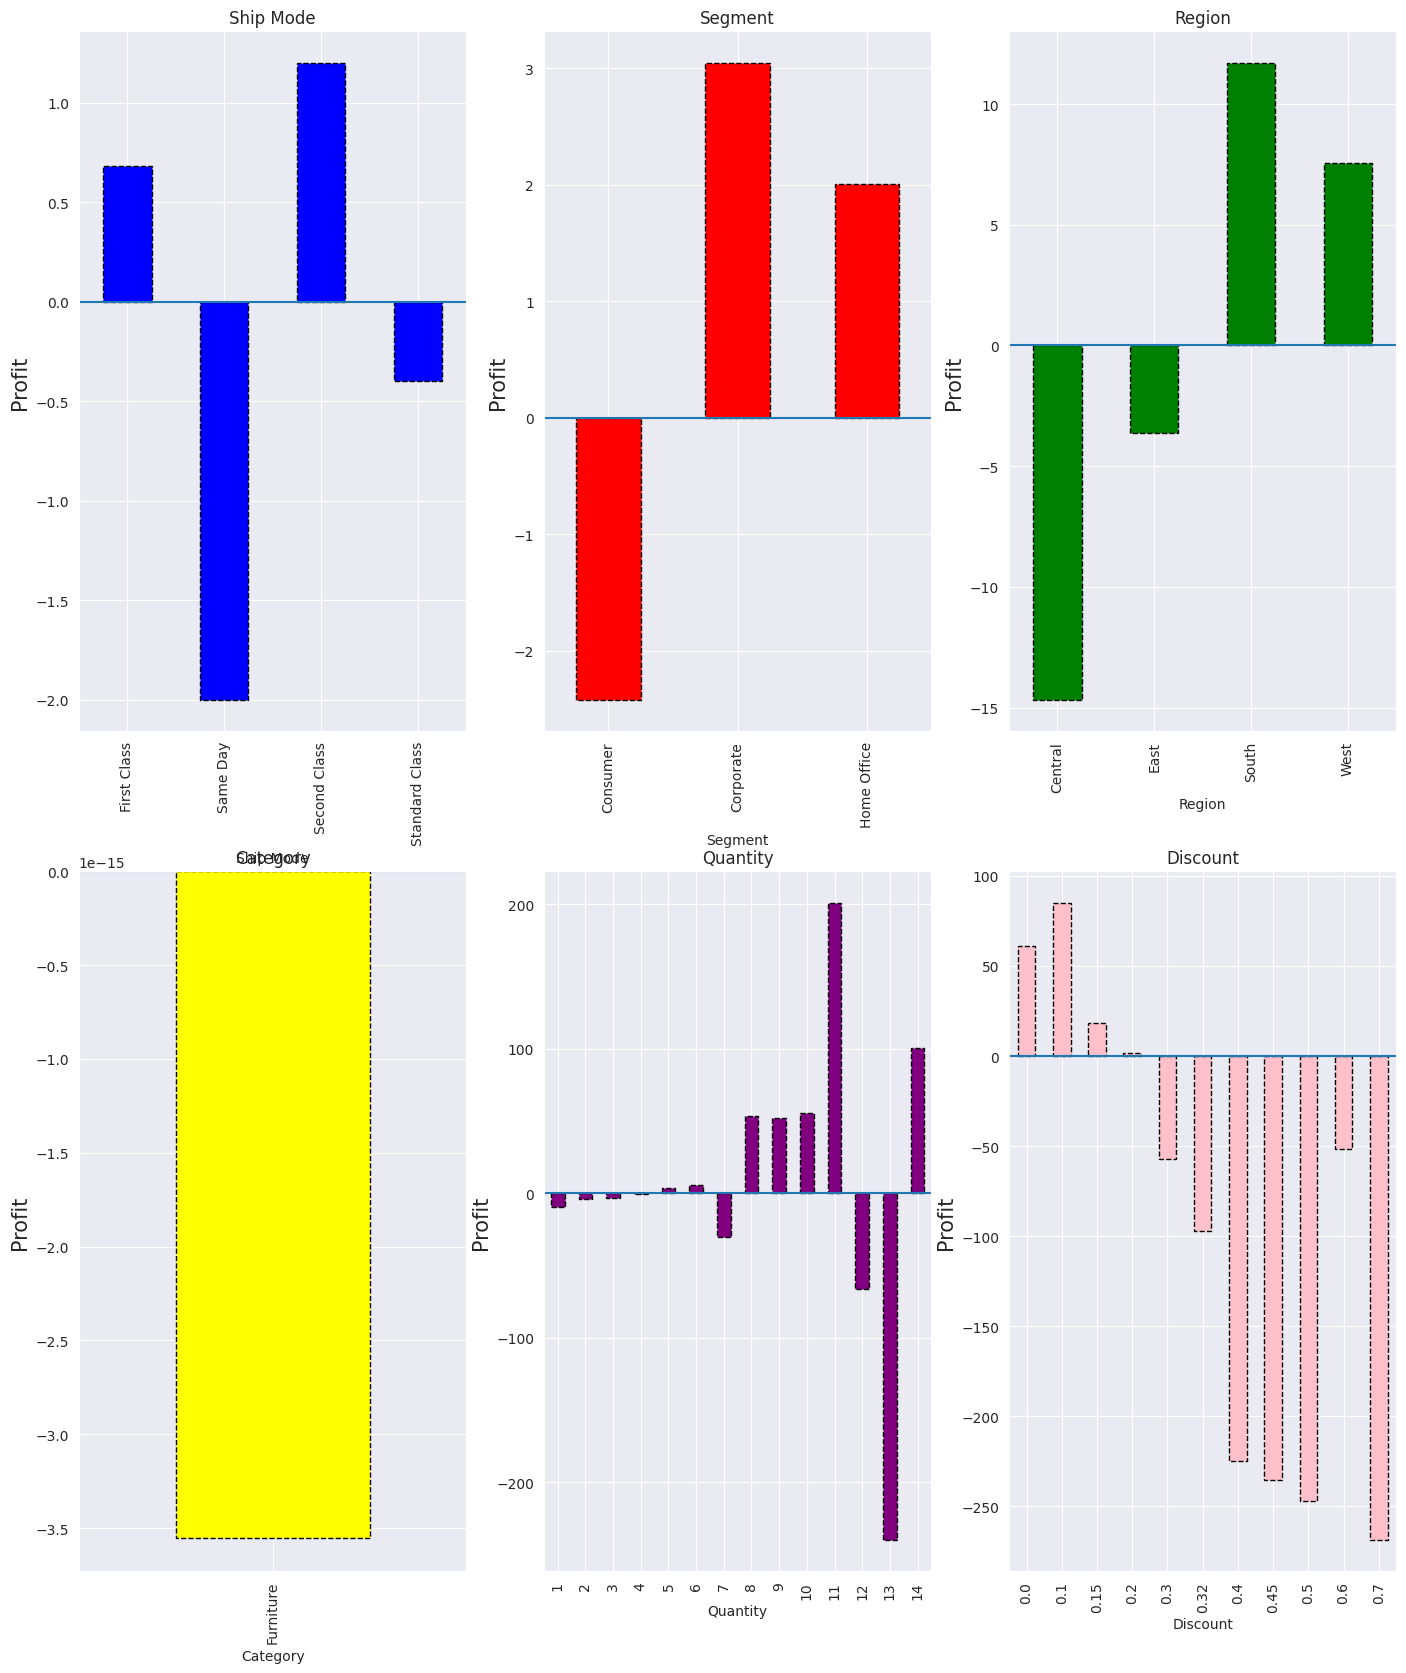

In [51]:
from math import ceil
def median_dev(dataframe,target,maxcol,cols,palette,size):
    moy=df[target].median()
    fig=plt.figure(figsize=size)
    l=len(cols)
    ligns=ceil(l/maxcol)
    i=1
    for item in cols:
        plt.subplot(ligns,maxcol,i)
        plt.title(item)
        (df.groupby(str(item))[str(target)].median()-moy).plot(kind='bar',color=palette[i-1],ls='dashed',edgecolor='Black')
        plt.ylabel(str(target),size=15)
        plt.axhline(y=0)
        i =i+1
    plt.show()
    fig.tight_layout(pad=10.0)
mean_dev(df,'Profit',3,['Ship Mode','Segment','Region','Category','Quantity','Discount'],['Blue','Red','Green','Yellow','Purple','Pink'],(17,20))

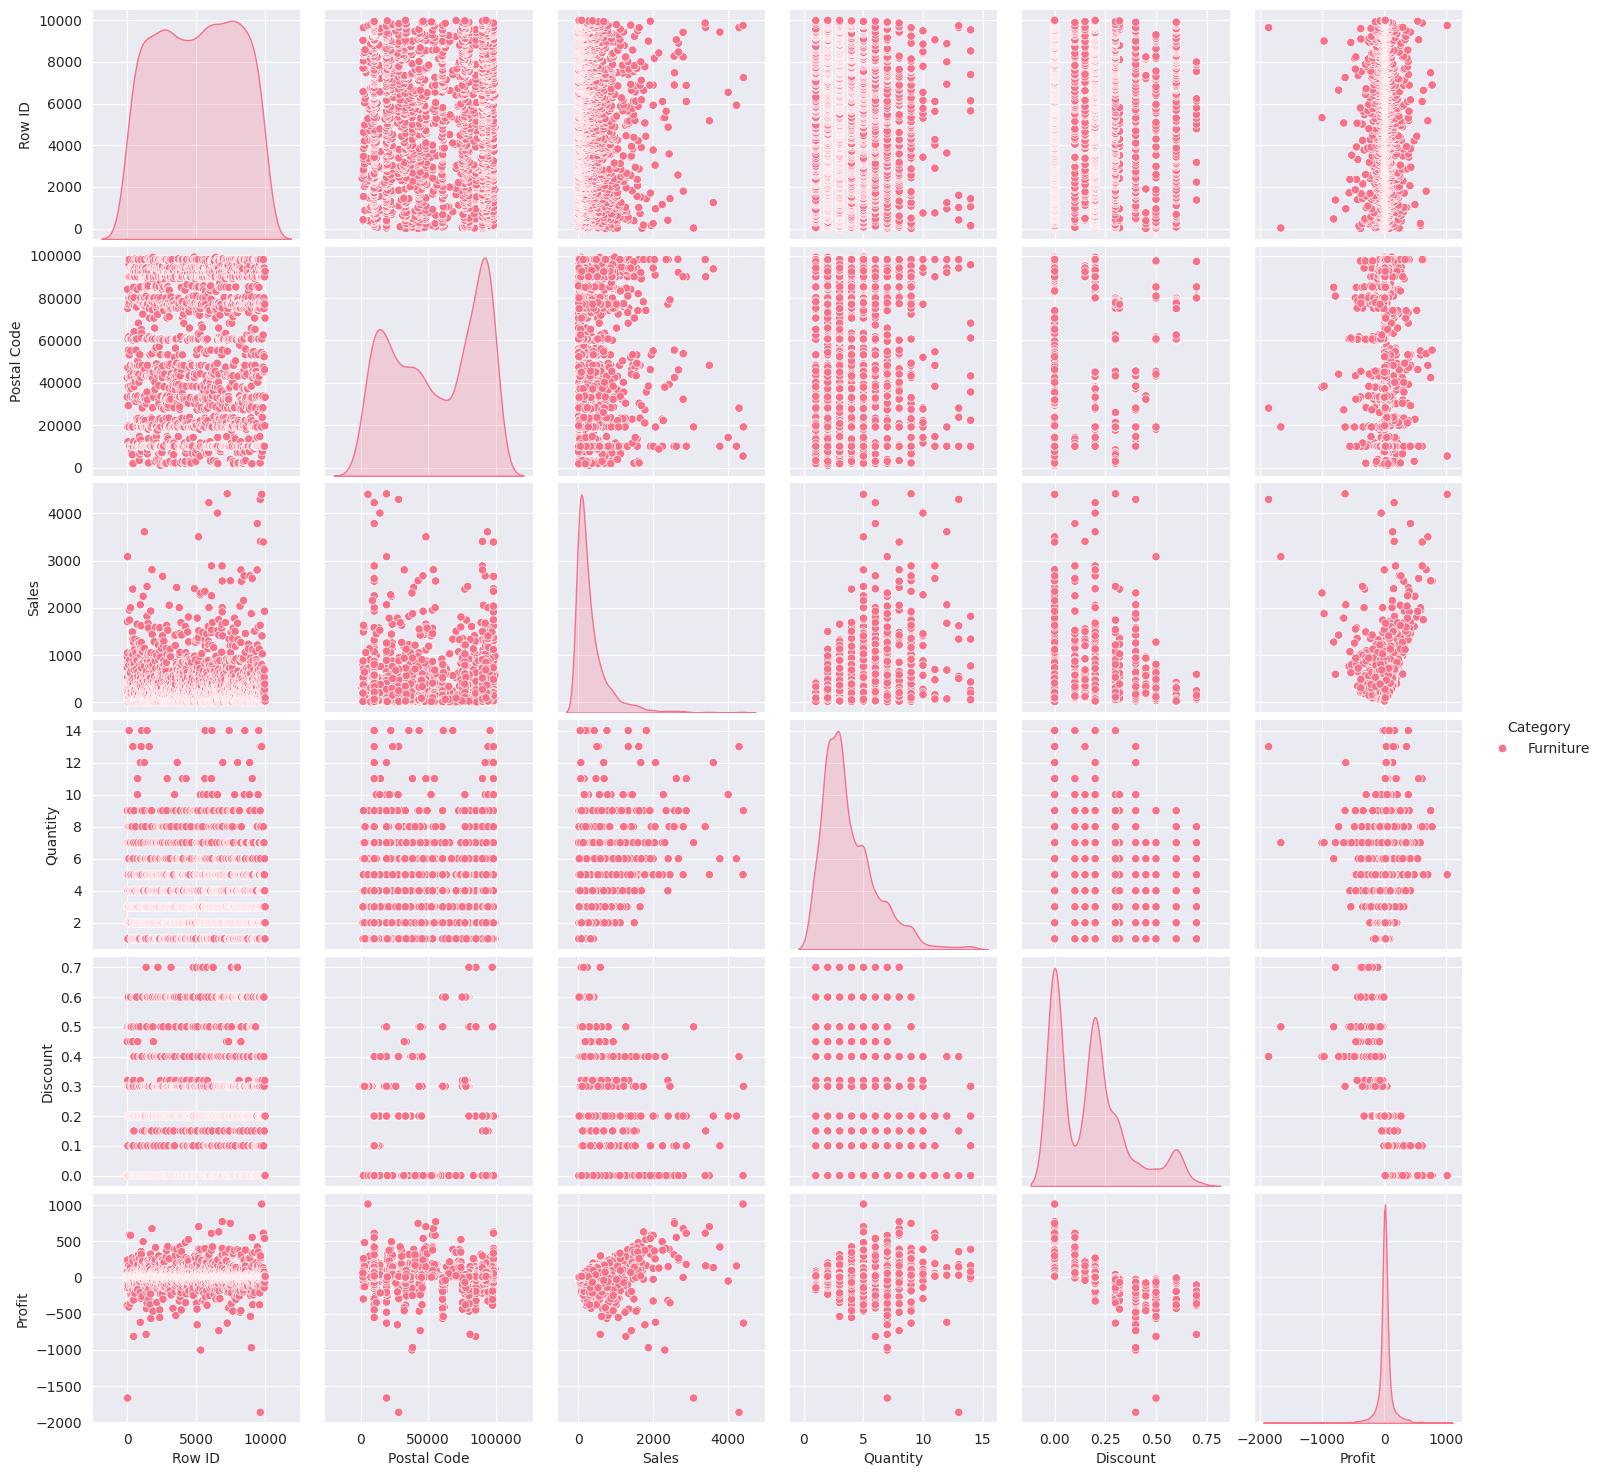

In [52]:
sns.pairplot(df, hue='Category', diag_kind='kde', palette='husl')


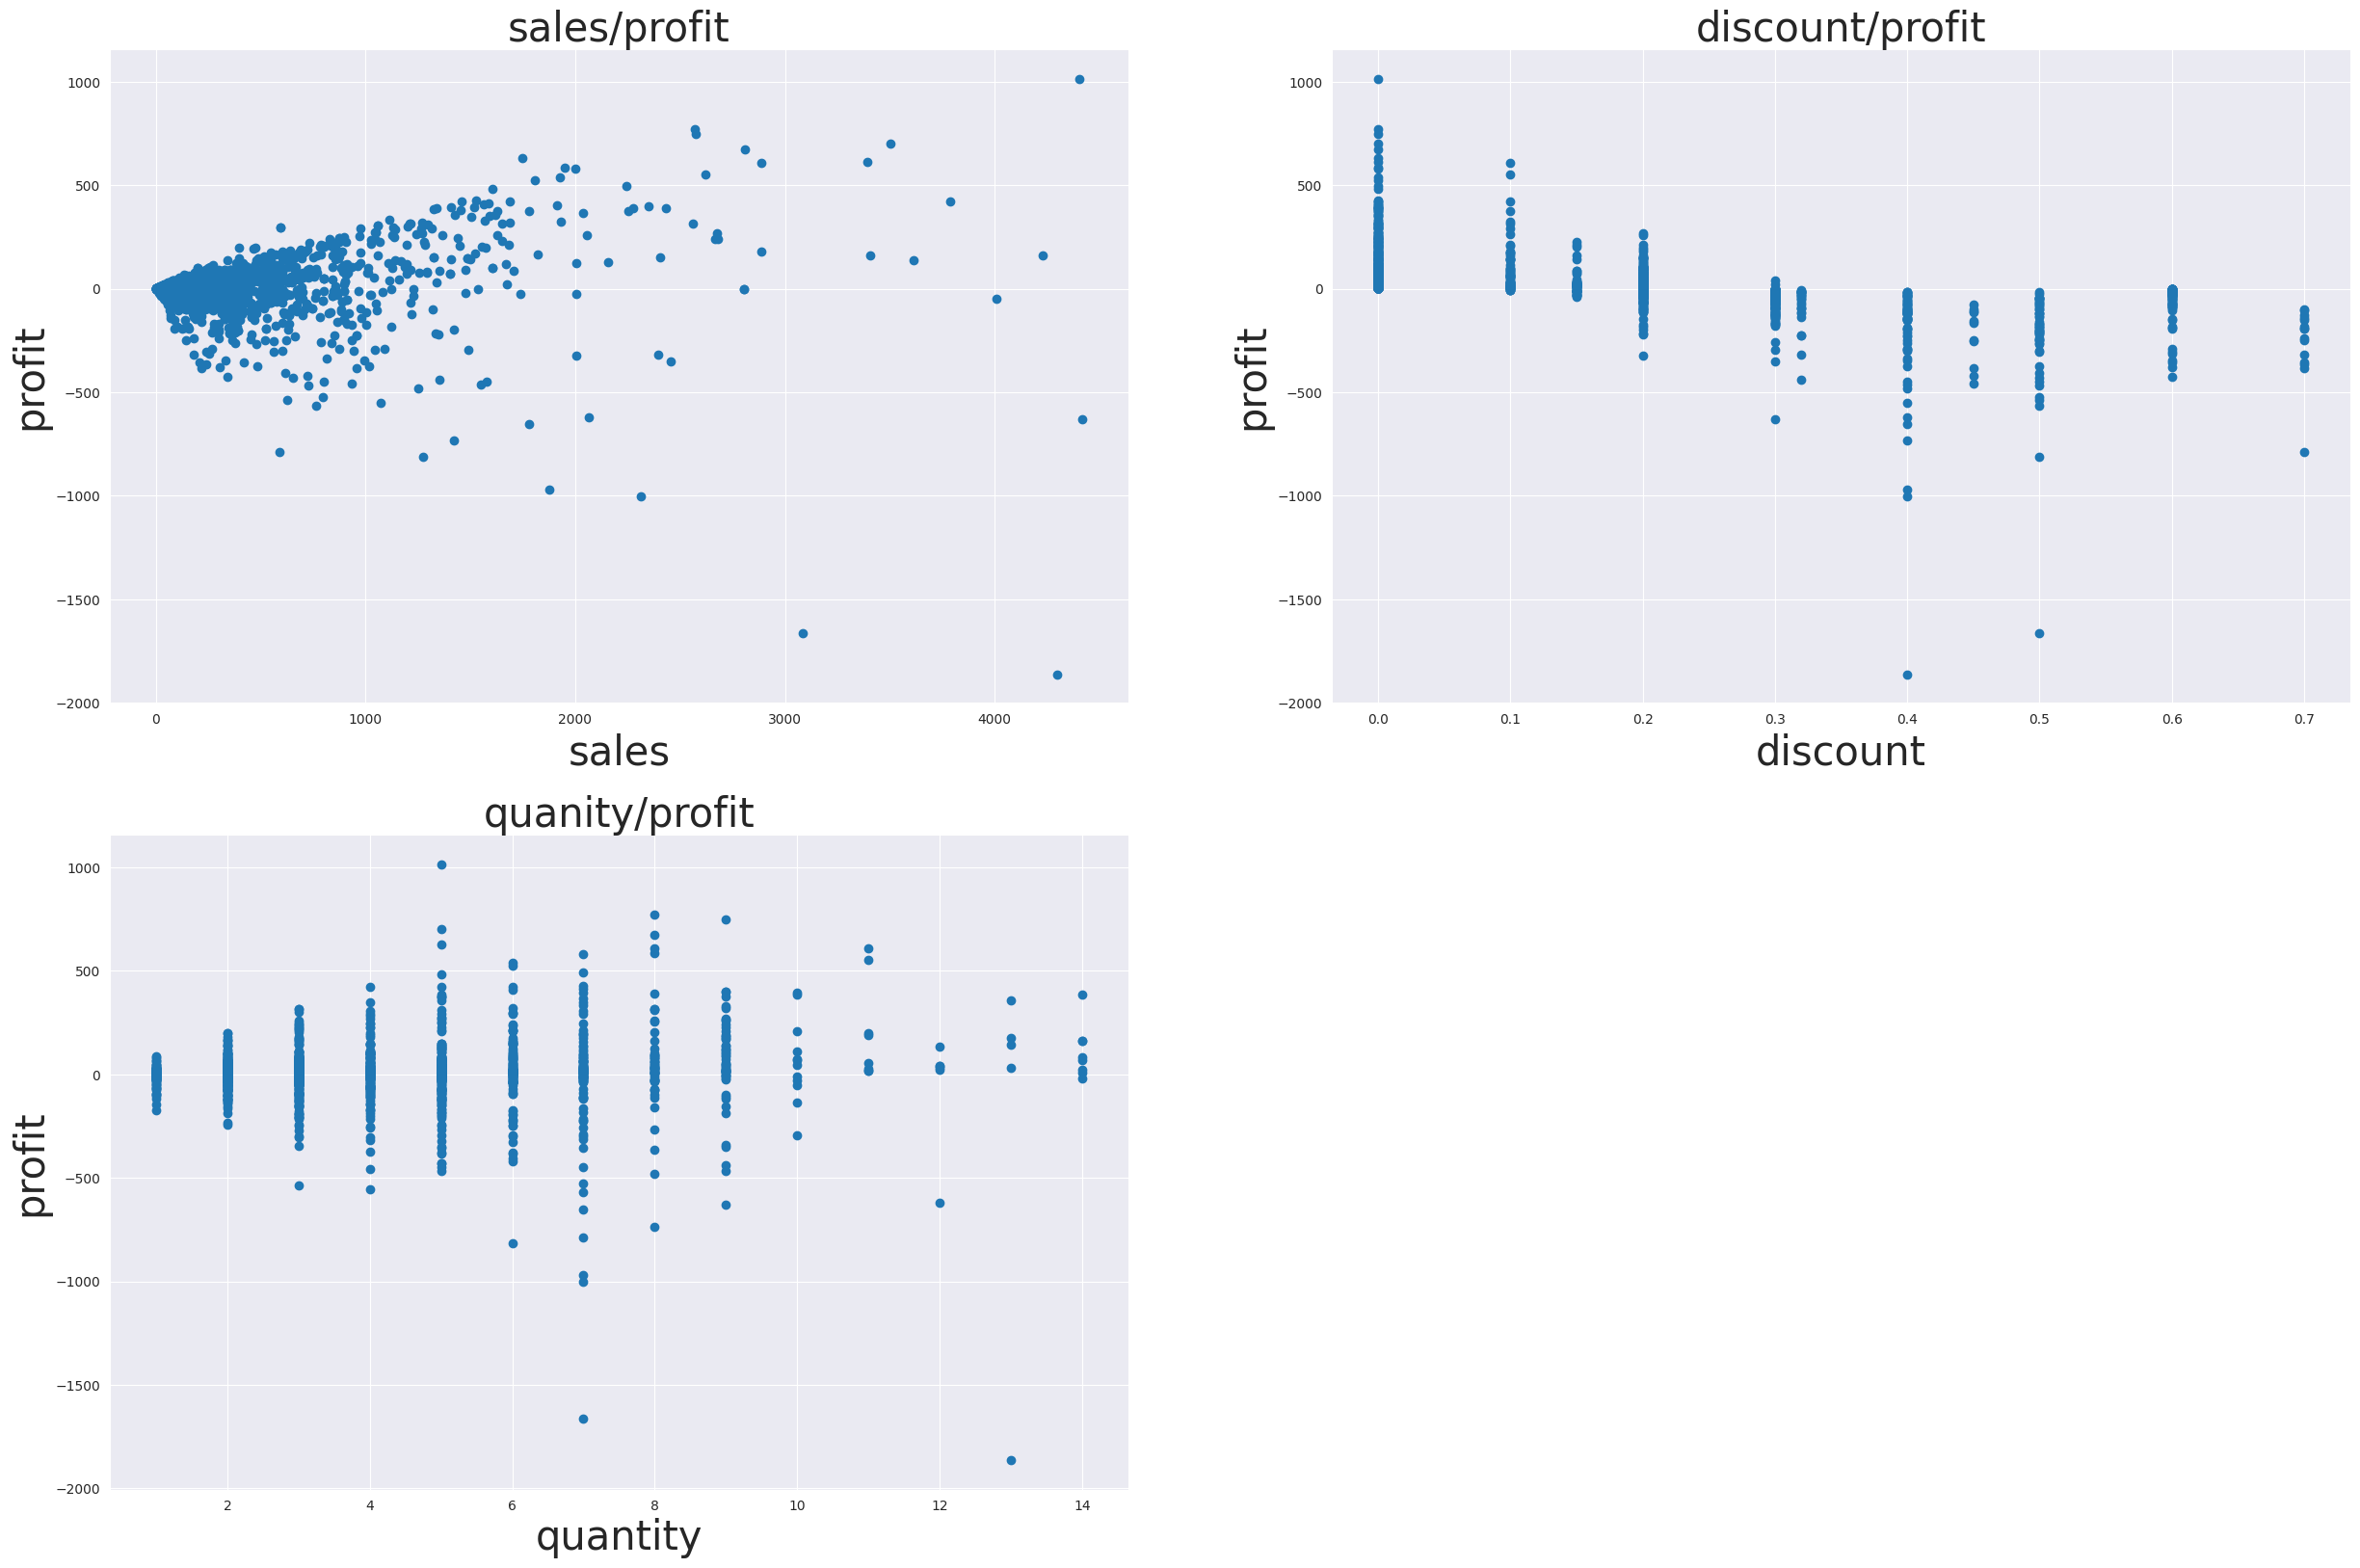

In [53]:
figplots=plt.figure(figsize=(30,30))
plt.subplot(3,2,1)
plt.title("sales/profit",fontsize=30)
plt.xlabel("sales",size=30)
plt.ylabel("profit",size=30)
plt.scatter(df['Sales'],df['Profit'])

plt.subplot(3,2,2)
plt.title("discount/profit",fontsize=30)
plt.xlabel("discount",size=30)
plt.ylabel("profit",size=30)
plt.scatter(df['Discount'],df['Profit'])

plt.subplot(3,2,3)
plt.title("quanity/profit",fontsize=30)
plt.xlabel("quantity",size=30)
plt.ylabel("profit",size=30)
plt.scatter(df['Quantity'],df['Profit'])
plt.show()

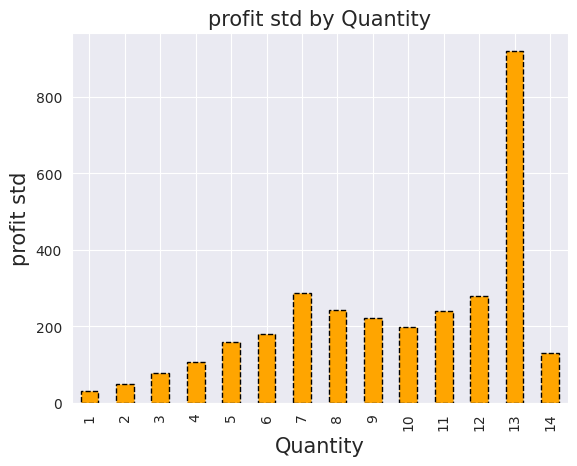

In [54]:
df.groupby('Quantity')['Profit'].std().plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')
plt.title("profit std by Quantity",size=15)
plt.xlabel("Quantity",size=15)
plt.ylabel("profit std",size=15)
plt.show()

<Axes: >

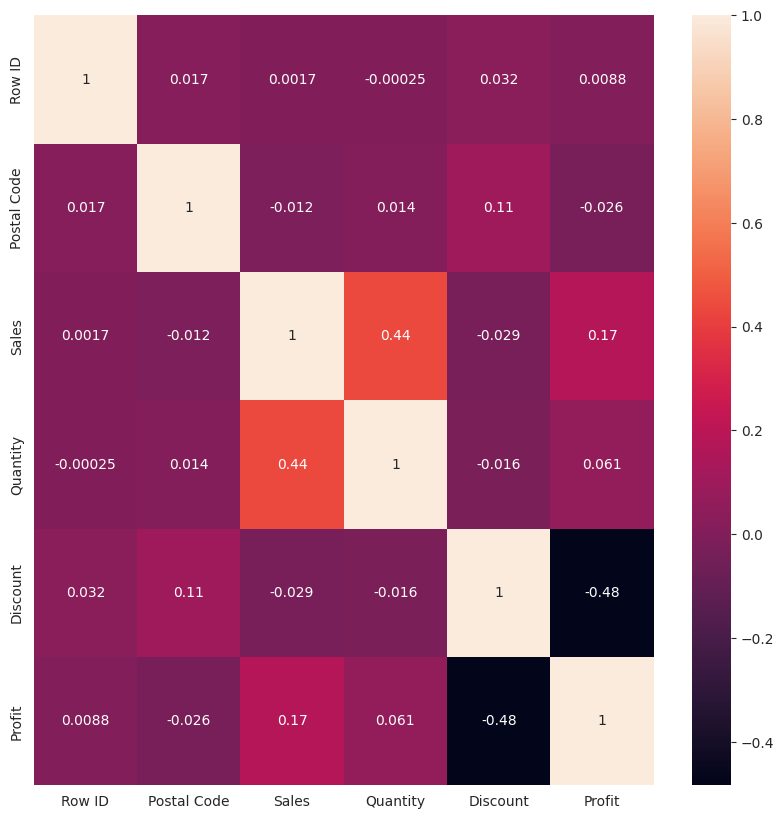

In [55]:
plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(),annot=True)

numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True)

In [56]:
from sklearn.cluster import KMeans


In [57]:
inertia=[]
k_range=range(1,20)
for K in k_range:
    model=KMeans(n_clusters=K).fit(pd.get_dummies(df[['Category','Region','Profit']]))
    inertia.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

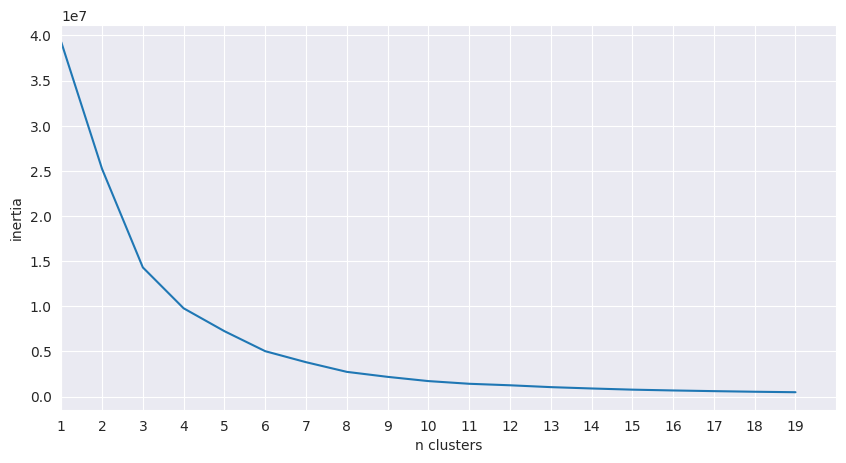

In [58]:
elbow=plt.figure(figsize=(10,5))
plt.plot(k_range,inertia)
plt.xlim([1,20])
plt.xticks(np.arange(1,20,step=1))
plt.xlabel('n clusters')
plt.ylabel('inertia')
plt.show()


In [59]:
model = KMeans(n_clusters=3)
model.fit(pd.get_dummies(df[['Category','Region','Profit']]))

Klusters=model.predict(pd.get_dummies(df[['Category','Region','Profit']]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
print(Klusters)

[0 1 2 ... 0 0 0]


In [61]:
centroids=model.cluster_centers_
filtered_data0=pd.get_dummies(df[['Category','Region','Profit']])[Klusters==0]

filtered_data1=pd.get_dummies(df[['Category','Region','Profit']])[Klusters==1]

filtered_data2=pd.get_dummies(df[['Category','Region','Profit']])[Klusters==2]

In [62]:
filtered_data0.describe()


Profit  Category_Furniture  Region_Central  Region_East  \
count  1907.000000              1907.0     1907.000000  1907.000000   
mean      5.067183                 1.0        0.226009     0.280021   
std      52.798786                 0.0        0.418355     0.449127   
min    -195.478800                 1.0        0.000000     0.000000   
25%     -11.329600                 1.0        0.000000     0.000000   
50%       7.106000                 1.0        0.000000     0.000000   
75%      26.070600                 1.0        0.000000     1.000000   
max     151.470000                 1.0        1.000000     1.000000   

       Region_South  Region_West  
count   1907.000000  1907.000000  
mean       0.148401     0.345569  
std        0.355590     0.475678  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     0.000000  
75%        0.000000     1.000000  
max        1.000000     1.000000

In [63]:
filtered_data1.describe()


Profit  Category_Furniture  Region_Central  Region_East  \
count   135.000000               135.0      135.000000   135.000000   
mean    300.910933                 1.0        0.222222     0.296296   
std     146.395470                 0.0        0.417288     0.458324   
min     155.250000                 1.0        0.000000     0.000000   
25%     200.490000                 1.0        0.000000     0.000000   
50%     256.784000                 1.0        0.000000     0.000000   
75%     361.429900                 1.0        0.000000     1.000000   
max    1013.127000                 1.0        1.000000     1.000000   

       Region_South  Region_West  
count    135.000000   135.000000  
mean       0.266667     0.214815  
std        0.443864     0.412223  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     0.000000  
75%        1.000000     0.000000  
max        1.000000     1.000000

In [31]:
filtered_data2.describe()


Profit  Category_Furniture  Region_Central  Region_East  \
count   135.000000               135.0      135.000000   135.000000   
mean    300.910933                 1.0        0.222222     0.296296   
std     146.395470                 0.0        0.417288     0.458324   
min     155.250000                 1.0        0.000000     0.000000   
25%     200.490000                 1.0        0.000000     0.000000   
50%     256.784000                 1.0        0.000000     0.000000   
75%     361.429900                 1.0        0.000000     1.000000   
max    1013.127000                 1.0        1.000000     1.000000   

       Region_South  Region_West  
count    135.000000   135.000000  
mean       0.266667     0.214815  
std        0.443864     0.412223  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     0.000000  
75%        1.000000     0.000000  
max        1.000000     1.000000

In [32]:
print(centroids[0])
print()
print(centroids[1])
print()
print(centroids[2])

[4.85279932 1.         0.22577266 0.28025144 0.14876899 0.34520691]

[-4.08255805e+02  1.00000000e+00  2.59740260e-01  3.37662338e-01
  1.55844156e-01  2.46753247e-01]

[3.00910933e+02 1.00000000e+00 2.22222222e-01 2.96296296e-01
 2.66666667e-01 2.14814815e-01]


<Axes: title={'center': 'top 10 City median Sales'}, xlabel='State', ylabel='Sales'>

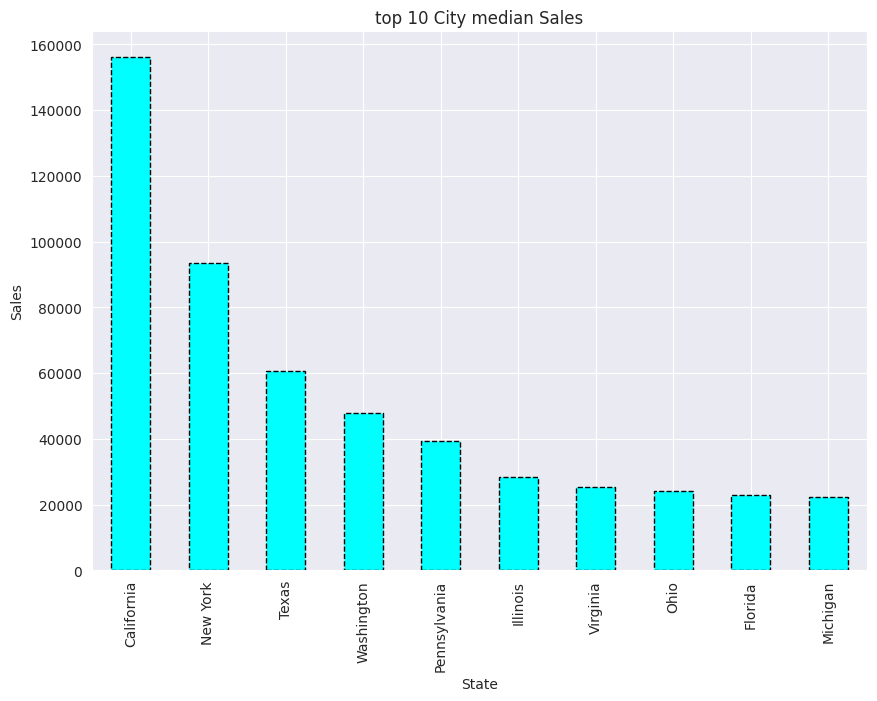

In [33]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('State')['Sales'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='cyan',ls='dashed',edgecolor='Black')

<Axes: title={'center': 'top 10 City median Sales'}, xlabel='State', ylabel='Sales'>

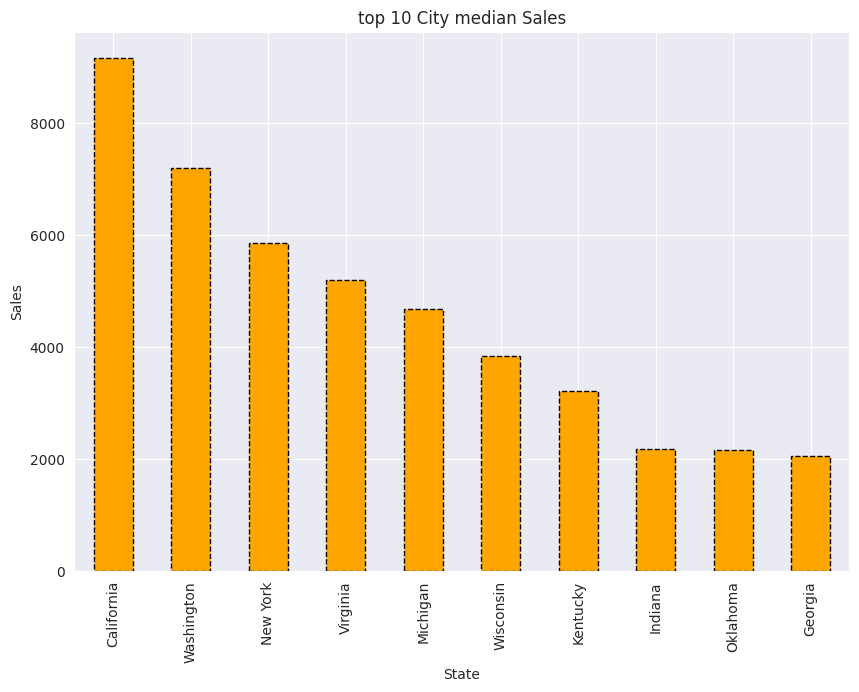

In [34]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('State')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')

<Axes: title={'center': 'top 10 City median Sales'}, xlabel='City', ylabel='Sales'>

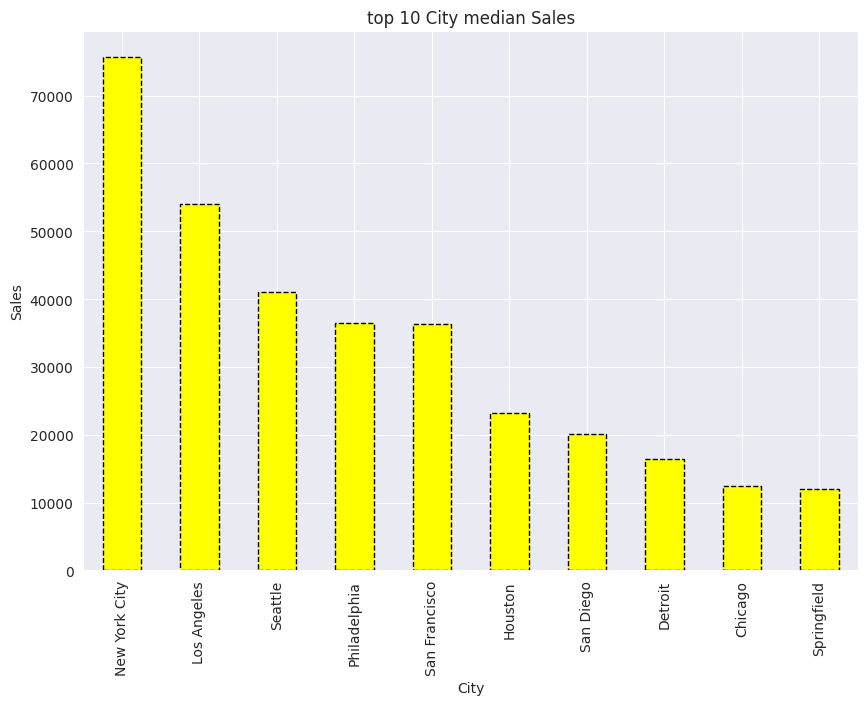

In [35]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('City')['Sales'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='yellow',ls='dashed',edgecolor='Black')

<Axes: title={'center': 'top 10 City median Sales'}, xlabel='City', ylabel='Sales'>

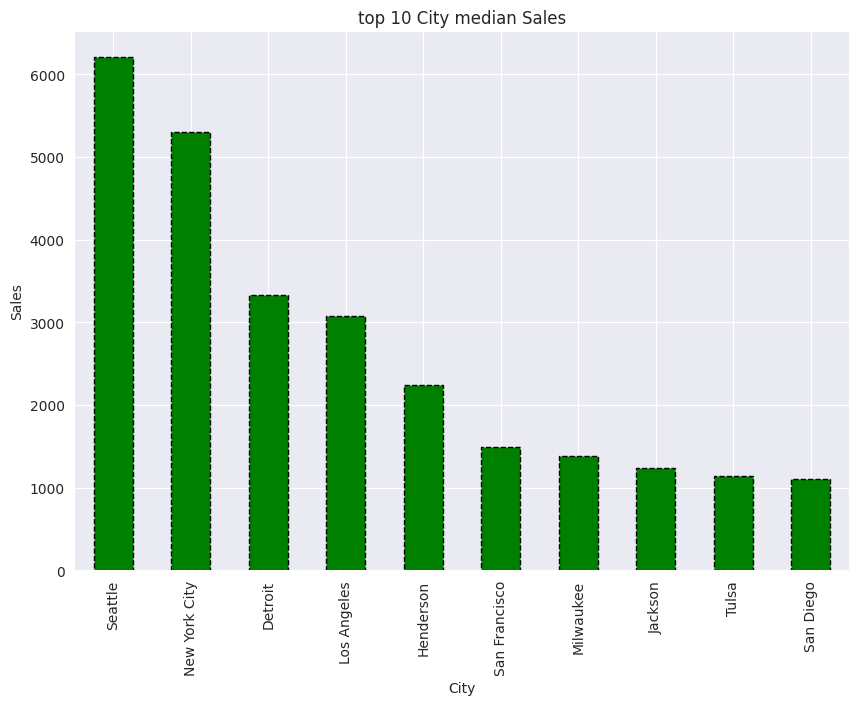

In [36]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='green',ls='dashed',edgecolor='Black')

<Axes: title={'center': 'sub-category median Sales'}, xlabel='Sub-Category', ylabel='Sales'>

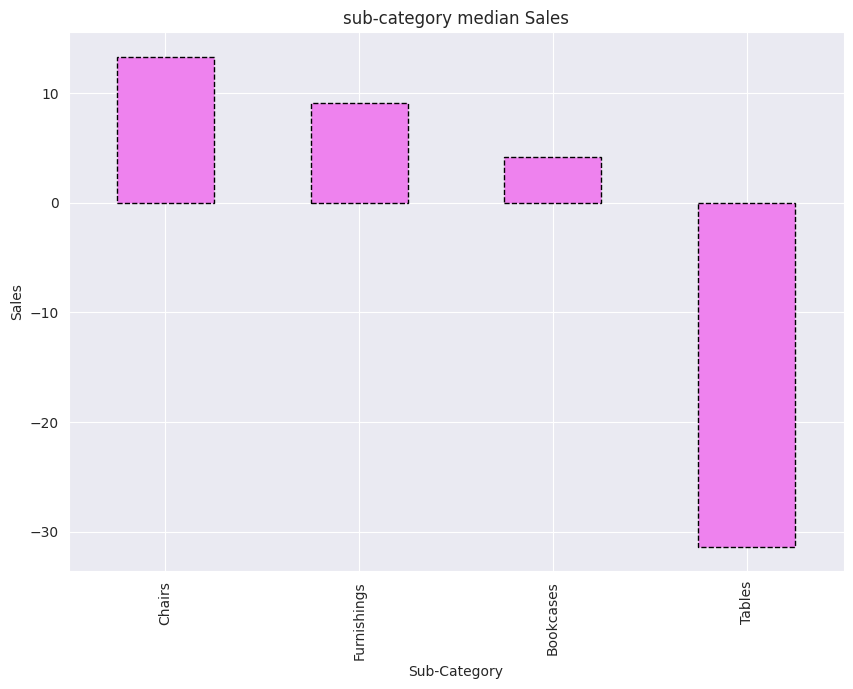

In [37]:
top10s=plt.figure(figsize=(10,7))
plt.title('sub-category median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('Sub-Category')['Profit'].median().sort_values(ascending=False)[0:10].plot(kind='bar',color='violet',ls='dashed',edgecolor='Black')

In [38]:
df[df['Sub-Category']=='Copiers'].shape


(0, 20)

<Axes: title={'center': 'worst sub category median Sales'}, xlabel='Sub-Category', ylabel='Sales'>

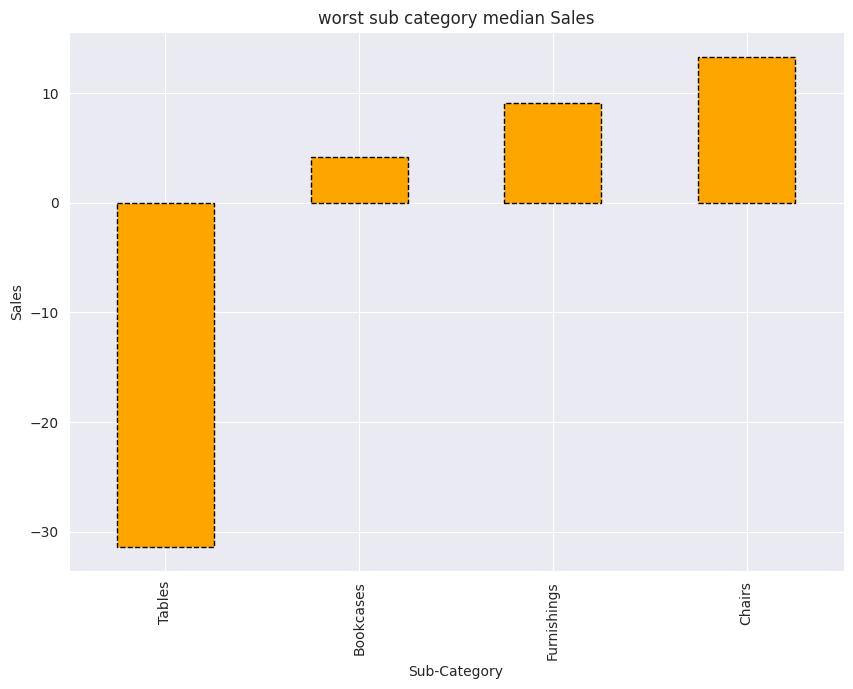

In [39]:
top10s=plt.figure(figsize=(10,7))
plt.title('worst sub category median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('Sub-Category')['Profit'].median().sort_values(ascending=True)[0:10].plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')

In [40]:
df_time = pd.read_csv('Super_Store_data.csv', on_bad_lines='skip', encoding='cp1252',index_col='Order Date',parse_dates=True)
df_time=df_time.rename_axis('Date')


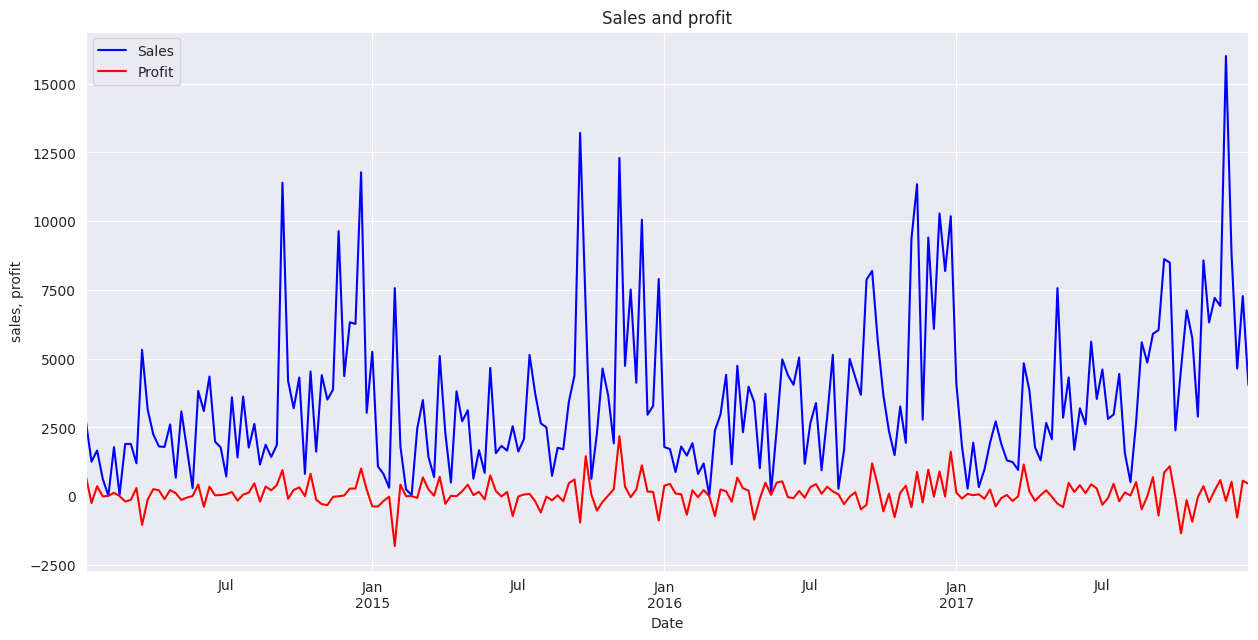

In [41]:
plt.figure(figsize=(15,7))
df_time['Sales'].resample('W').sum().plot(color='blue')
df_time['Profit'].resample('W').sum().plot(color='red')
plt.title("Sales and profit")
plt.xlabel("Date")
plt.ylabel("sales, profit")
plt.legend(['Sales','Profit'])
plt.show()

<Figure size 1500x700 with 0 Axes>

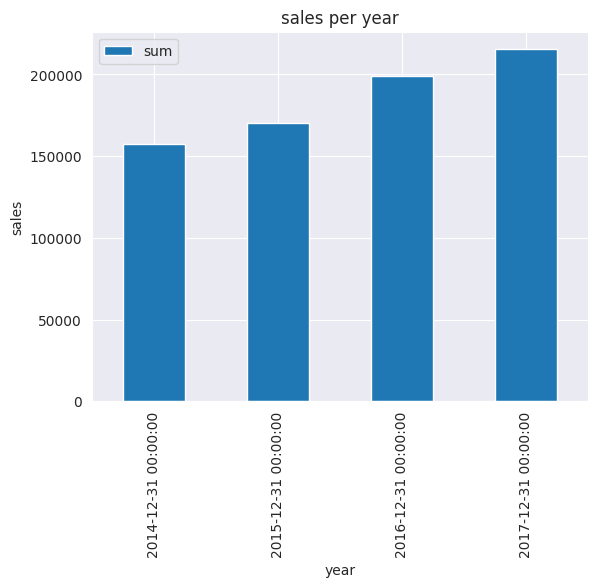

In [42]:
plt.figure(figsize=(15,7))
df_time['Sales'].resample('Y').agg(['sum']).plot(kind='bar')
plt.title('sales per year')
plt.xlabel('year',size=10)
plt.ylabel('sales',size=10)
plt.show()

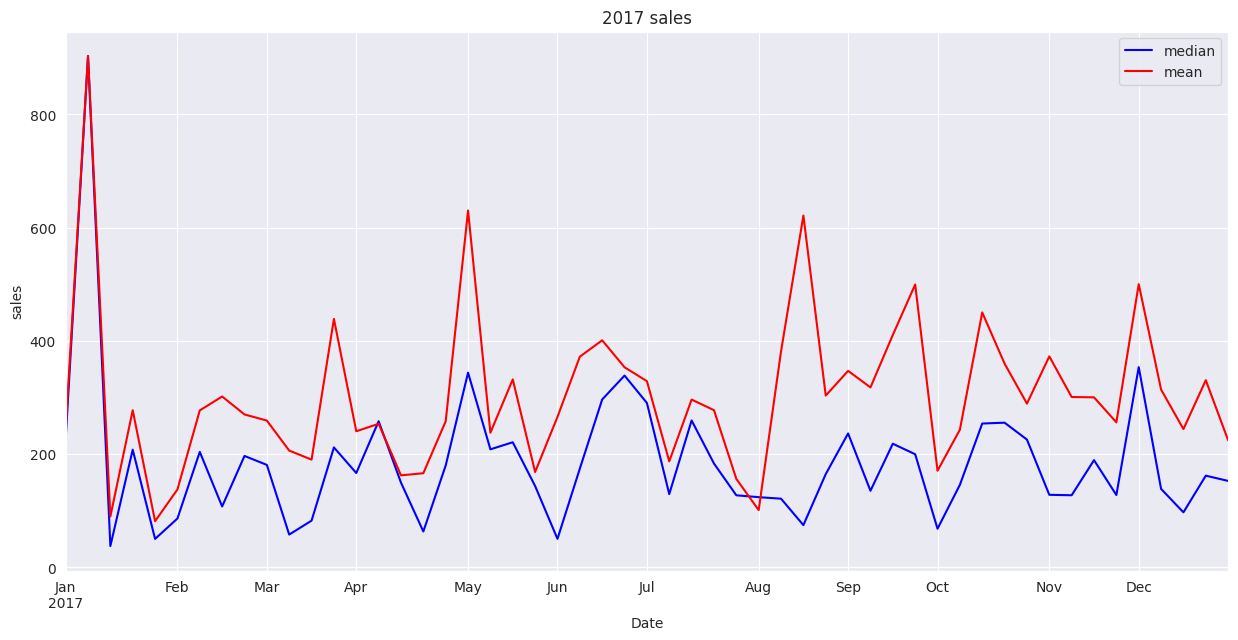

In [43]:
plt.figure(figsize=(15,7))
plt.title("2017 sales")
plt.xlabel("Date")
plt.ylabel("sales")
df_time.loc['2017']['Sales'].resample('W').median().plot(style='-',color='blue')
df_time.loc['2017']['Sales'].resample('W').mean().plot(style='-',color='red')
plt.legend(['median','mean'])
plt.show()

<Axes: title={'center': 'total sales'}, xlabel='Date'>

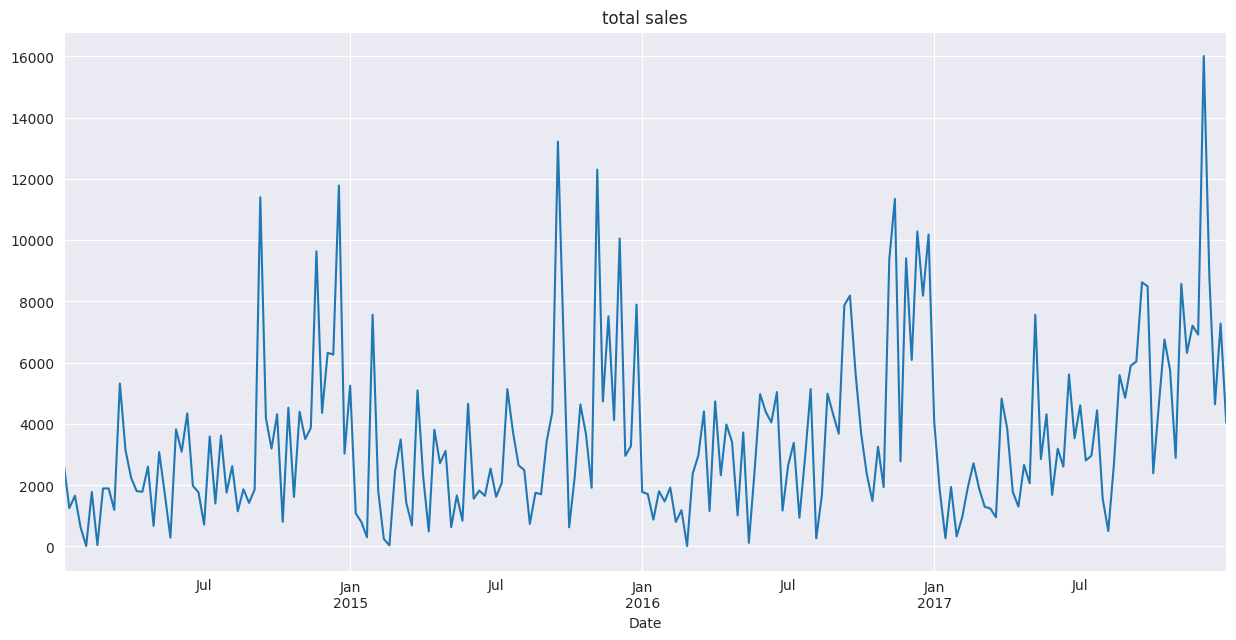

In [44]:
total=plt.figure(figsize=(15,7))
plt.title('total sales')
df_time['Sales'].resample('W').sum().plot()

[]

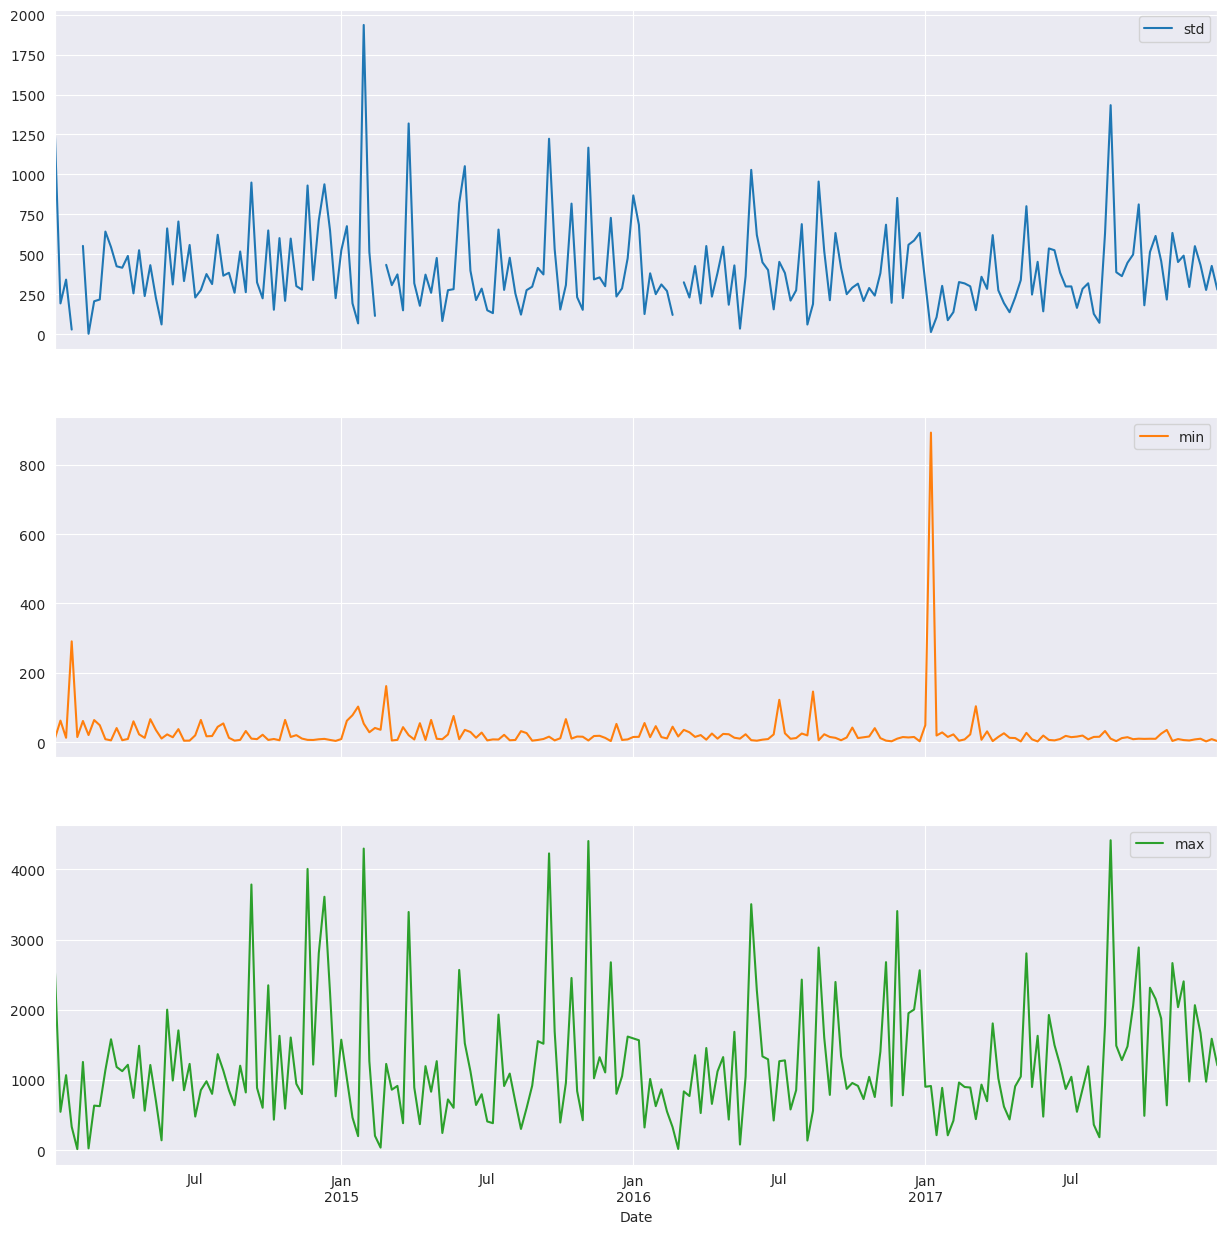

In [45]:
df_time['Sales'].resample('W').agg(['std','min','max']).plot(subplots=True,figsize=(15,15))
plt.plot()

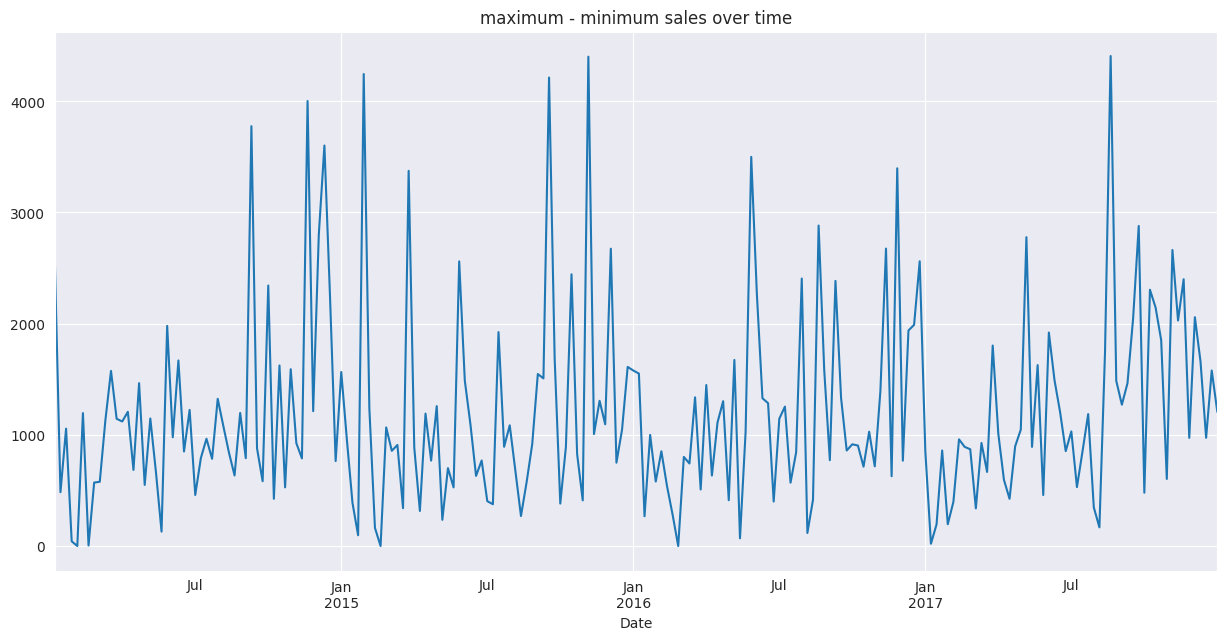

In [46]:
min_max=df_time['Sales'].resample('W').agg(['std','min','max'])
min_max['max_min']=min_max['max']-min_max['min']

minfig=plt.figure(figsize=(15,7))
plt.title("maximum - minimum sales over time")
min_max['max_min'].plot()
plt.show()

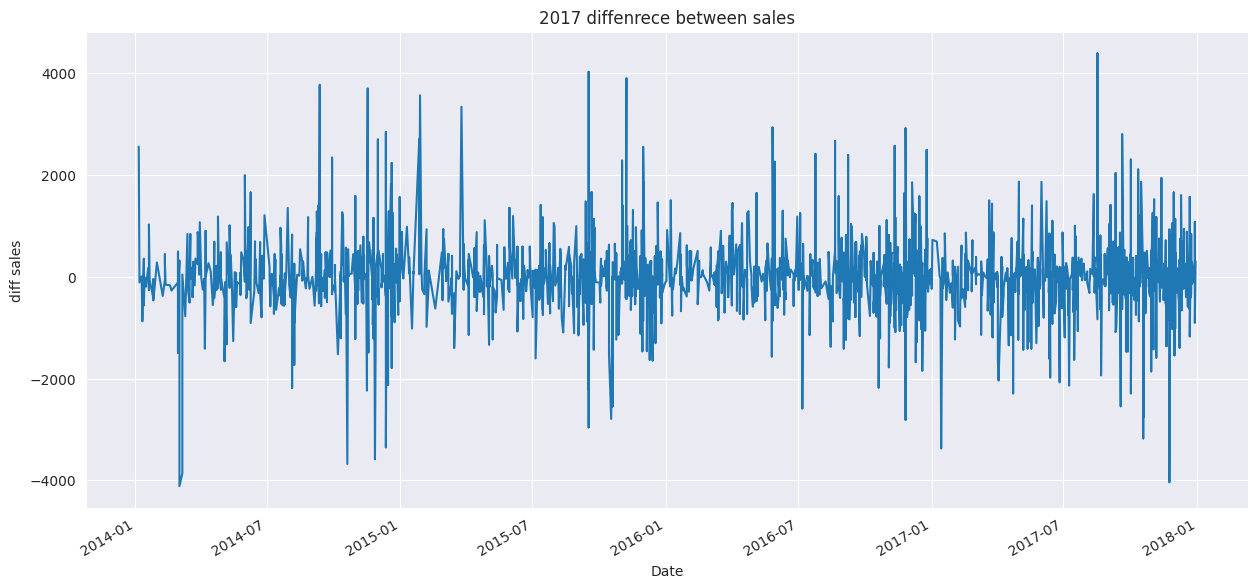

In [47]:
plt.figure(figsize=(15,7))
plt.title("2017 diffenrece between sales")
plt.xlabel("order dates")
plt.ylabel("diff sales")
df_time['Sales'].diff().plot()
plt.show()

<Figure size 2000x700 with 0 Axes>

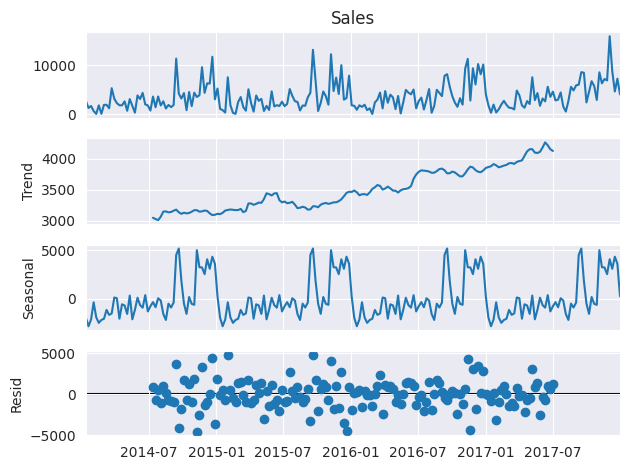

In [64]:
decomposition=sm.tsa.seasonal_decompose(df_time['Sales'].resample('W').sum(),model='additive')

figure=plt.figure(figsize=(20,7))
decomposition.plot()
plt.show()

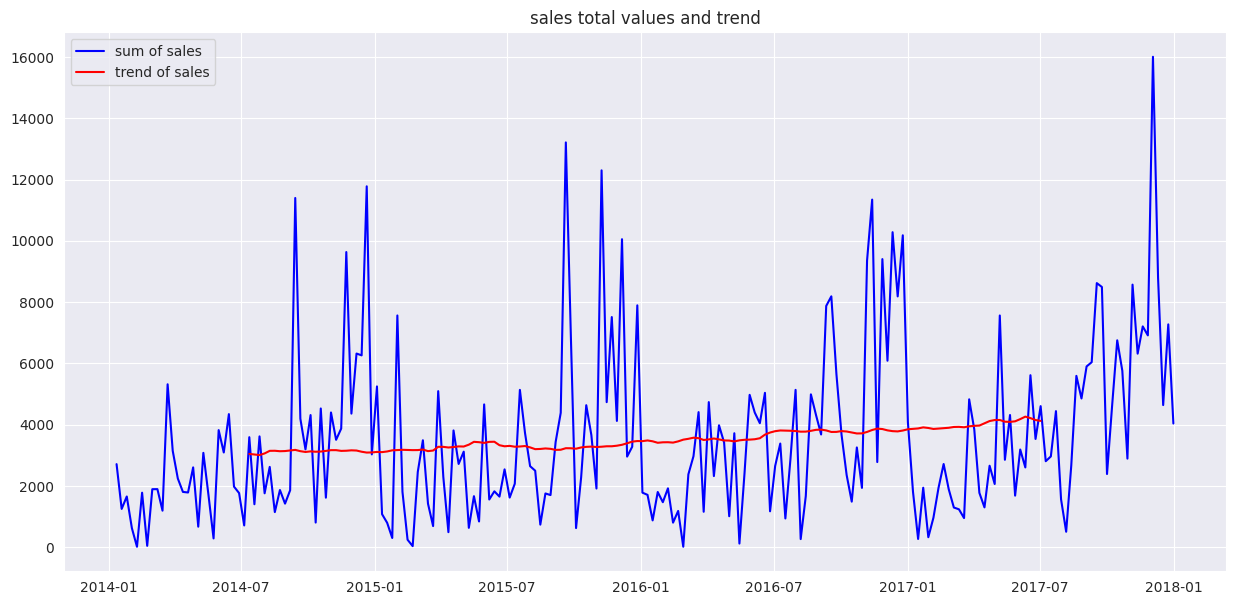

In [65]:
figtrend=plt.figure(figsize=(15,7))
plt.title("sales total values and trend")
plt.plot(df_time['Sales'].resample('W').sum(),c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.legend(["sum of sales","trend of sales"])
plt.show()

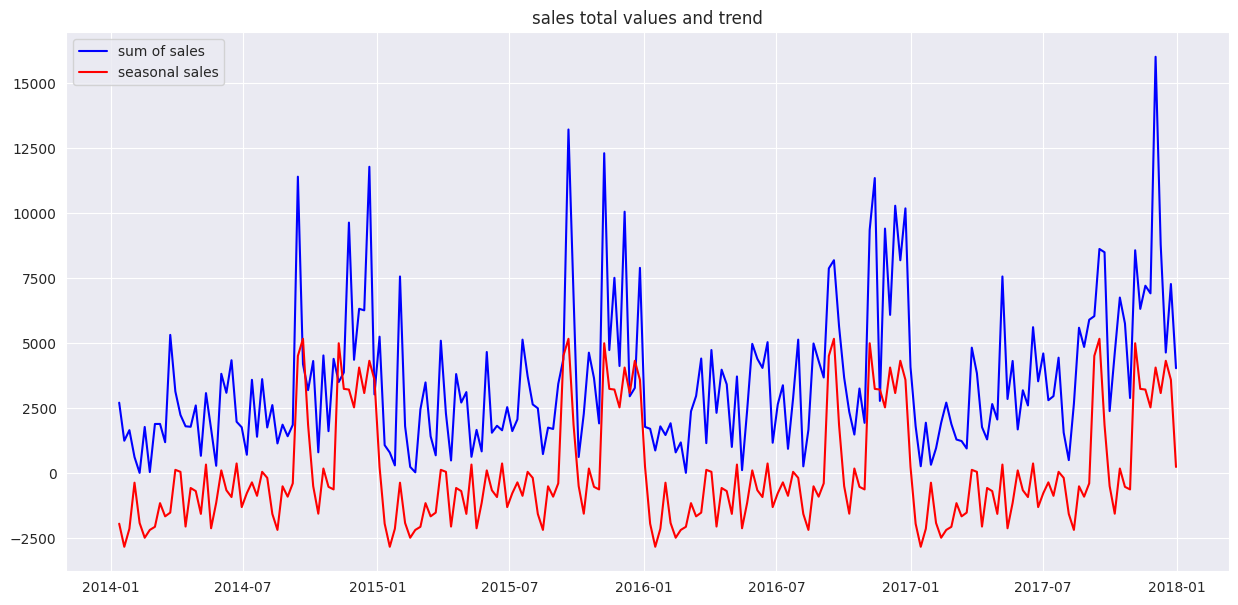

In [66]:
figseason=plt.figure(figsize=(15,7))
plt.title("sales total values and trend")
plt.plot(df_time['Sales'].resample('W').sum(),c='blue')
plt.plot(decomposition.seasonal.index, decomposition.seasonal, c='red')
plt.legend(["sum of sales","seasonal sales"])
plt.show()

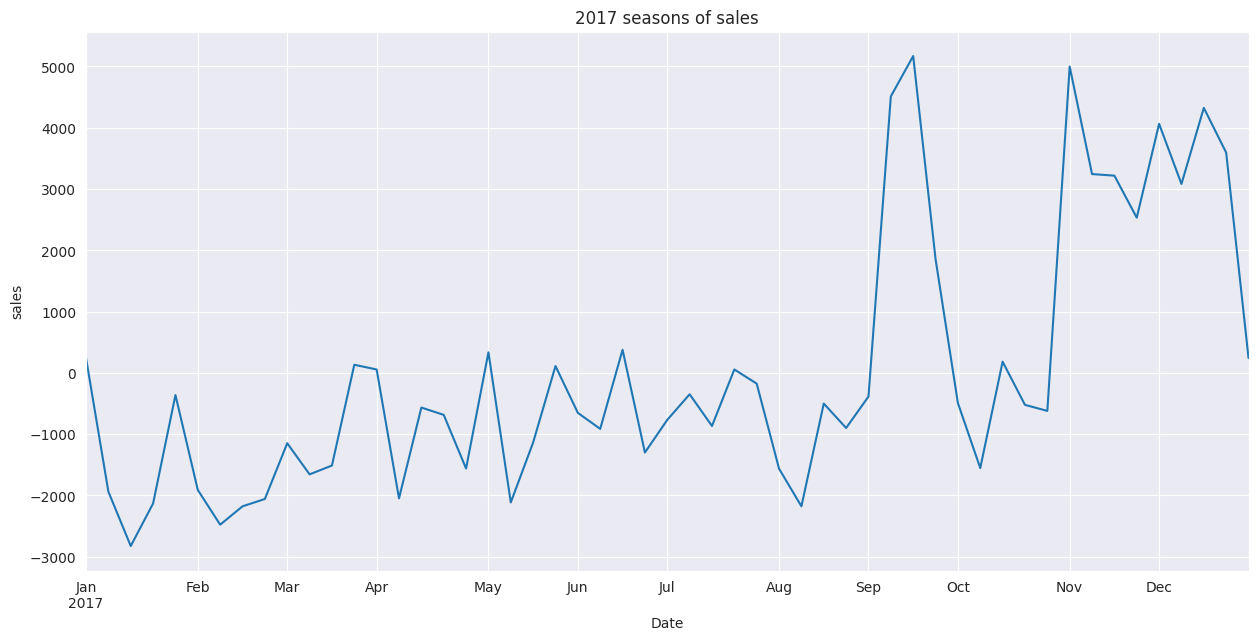

In [67]:
fig2017=plt.figure(figsize=(15,7))
plt.title("2017 seasons of sales")
plt.xlabel("time")
plt.ylabel("sales")
decomposition.seasonal['2017'].plot()
plt.show()

In [68]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


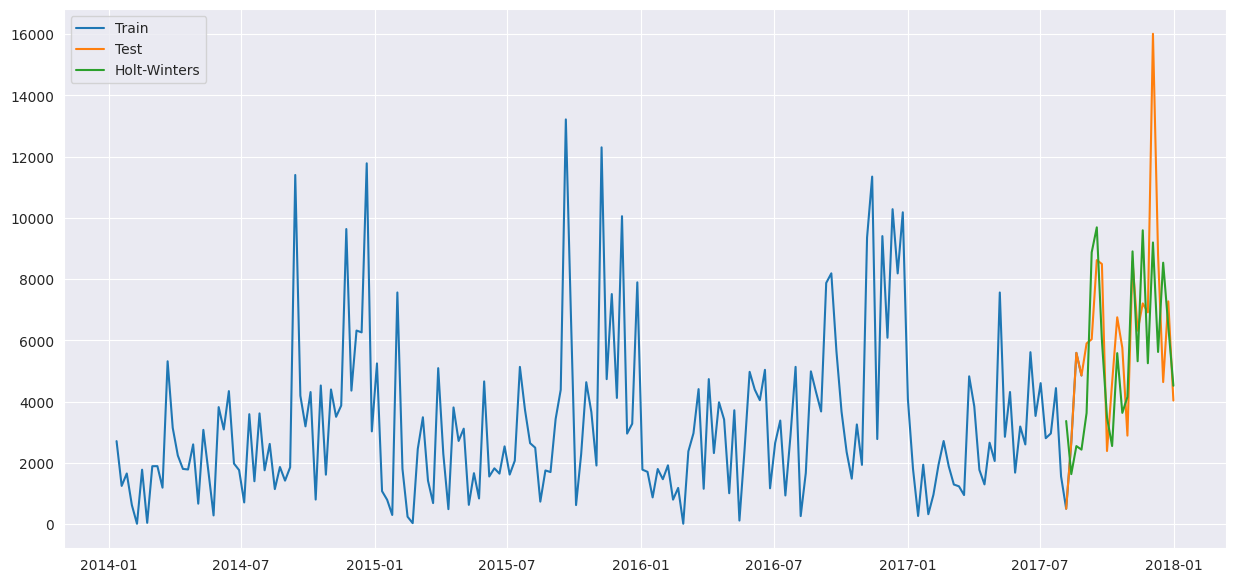

In [69]:
X=df_time['Sales'].resample('W').sum()

train=X['2014-01-05':'2017-08']
test=X['2017-08':]

model = ExponentialSmoothing(train, trend='add',seasonal='add').fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

predfig=plt.figure(figsize=(15,7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


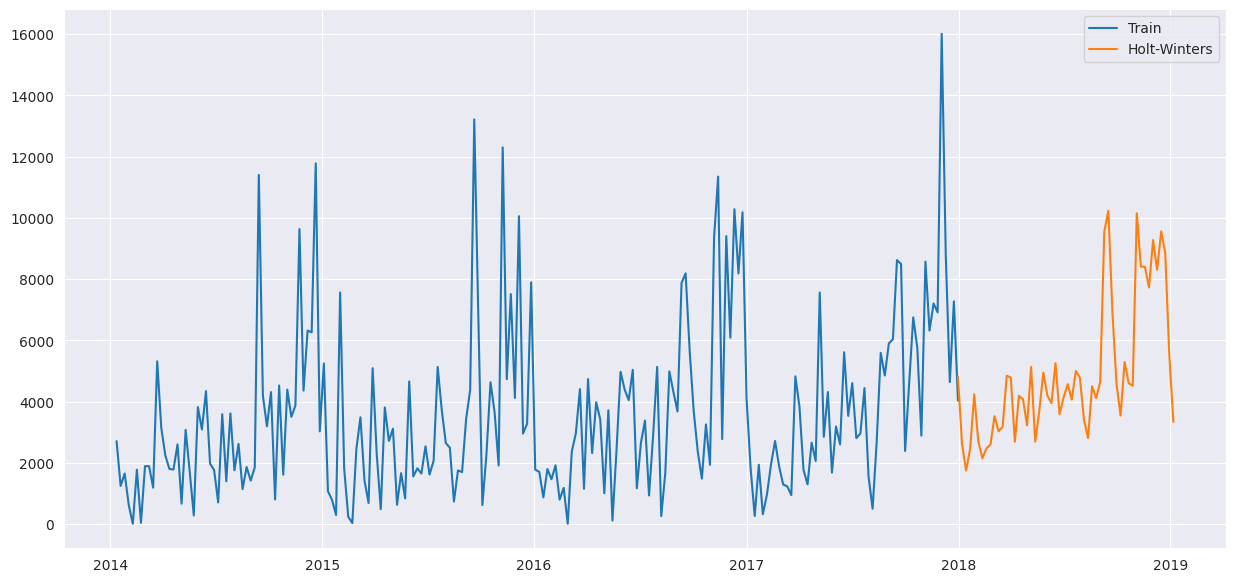

In [70]:
X=df_time['Sales'].resample('W').sum()


model = ExponentialSmoothing(X, trend='add',seasonal='add').fit()

pred = model.predict(start=X.index[-1], end='2019')

predfig=plt.figure(figsize=(15,7))
plt.plot(X.index, X, label='Train')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()


In [71]:
from keras import datasets, layers, models, losses, Sequential, Model
from keras.layers import LSTM,Dense

In [72]:
l=len(df_time['Sales'].resample('W').sum())
print(l)

208


In [73]:
X=np.array([])
y=np.array([])

sample=50
for i in range(l-(sample+10)):
    X=np.append(X,df_time['Sales'].resample('W').sum()[i:i+sample])
    y=np.append(y,df_time['Sales'].resample('W').sum()[i+sample:i+sample+10])


In [74]:
X=np.reshape(X,(l-(sample+10),sample))
y=np.reshape(y,(l-(sample+10),10))

In [75]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
X.shape

(148, 1, 50)

In [76]:
model2 = Sequential()

model2.add(LSTM(units = 500, input_shape = (1,sample), activation="relu"))
model2.add(Dense(100, activation="relu"))
model2.add(Dense(100))

model2.compile(loss='mean_squared_error', optimizer='rmsprop')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500)               1102000   
                                                                 
 dense (Dense)               (None, 100)               50100     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
Total params: 1162200 (4.43 MB)
Trainable params: 1162200 (4.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
